In [1]:
import pandas as pd
import numpy as np
import csv
import geopandas as gpd
from shapely.geometry import Polygon, mapping, Point
from rtree import Rtree
import pygeos

/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
#read the routes file that contains one point per route
routes = pd.read_csv("Routes_Tableau.csv")

#routes to dataframe
routes_df = gpd.GeoDataFrame(routes, geometry=gpd.points_from_xy(routes["Longitude (generated)"], routes["Latitude (generated)"]))

In [3]:
routes_df

,Garb Rt,Geometry (Garbage Routes.geojson),Latitude (generated),Longitude (generated),geometry
0,PW41,MultiPolygon,30.358764,-97.669893,POINT (-97.66989 30.35876)
1,PW40,MultiPolygon,30.363255,-97.674997,POINT (-97.67500 30.36326)
2,PW32,MultiPolygon,30.371456,-97.641614,POINT (-97.64161 30.37146)
3,PW31,MultiPolygon,30.384221,-97.683817,POINT (-97.68382 30.38422)
4,PW30,MultiPolygon,30.370076,-97.662850,POINT (-97.66285 30.37008)
...,...,...,...,...,...
179,PAF50,MultiPolygon,30.290980,-97.770219,POINT (-97.77022 30.29098)
180,PAF04,MultiPolygon,30.296413,-97.775421,POINT (-97.77542 30.29641)
181,PAF03,MultiPolygon,30.330845,-97.766747,POINT (-97.76675 30.33084)
182,PAF02,MultiPolygon,30.308143,-97.765677,POINT (-97.76568 30.30814)


In [5]:
# use base directory and filename to create the geopandas dataframe
zips = gpd.read_file(f"austin_area_zip_codes.csv",GEOM_POSSIBLE_NAMES="the_geom", KEEP_GEOM_COLUMNS="NO")
zips

,geodb_oid,objectid,zipcodes_i,zipcode,name,created_by,created_da,modified_b,modified_d,shape_area,shape_len,cartodb_id,created_at,updated_at,geometry
0,3,3,56,78739,AUSTIN,,,,,338340541.543711,97785.7933337692,3,2015-06-07 00:48:14.456593+00,2015-06-07 00:48:14.456593+00,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ..."
1,4,4,57,78645,LEANDER,,,,,1043395959.57919,196654.442799695,4,2015-06-07 00:48:14.456593+00,2015-06-07 00:48:14.456593+00,"MULTIPOLYGON (((-97.91075 30.50110, -97.91053 ..."
2,16,16,10,78602,BASTROP,,,,,5914481887.52673,506803.883036815,9,2015-06-07 00:48:14.456593+00,2015-06-07 00:48:14.456593+00,"MULTIPOLYGON (((-97.27371 30.29662, -97.27323 ..."
3,17,17,11,78655,MARTINDALE,,,,,1846885535.93133,212904.793002763,10,2015-06-07 00:48:14.456593+00,2015-06-07 00:48:14.456593+00,"MULTIPOLYGON (((-97.73690 29.78761, -97.73582 ..."
4,18,18,12,78617,DEL VALLE,,,,,1885223526.51104,273994.824301404,11,2015-06-07 00:48:14.456593+00,2015-06-07 00:48:14.456593+00,"MULTIPOLYGON (((-97.51624 30.21906, -97.51600 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,80,80,70,78660,PFLUGERVILLE,,,,,1213140713.6585,190996.848040473,71,2015-06-07 00:48:14.456593+00,2015-06-07 00:48:14.456593+00,"MULTIPOLYGON (((-97.57653 30.50086, -97.57450 ..."
76,63,63,74,78662,RED ROCK,,,,,1357638197.77877,174824.670166598,74,2015-06-07 00:48:14.456593+00,2015-06-07 00:48:14.456593+00,"MULTIPOLYGON (((-97.45105 30.01521, -97.44517 ..."
77,64,64,75,78705,AUSTIN,,,,,55484330.3646342,51538.1644154149,75,2015-06-07 00:48:14.456593+00,2015-06-07 00:48:14.456593+00,"MULTIPOLYGON (((-97.72978 30.29871, -97.72893 ..."
78,68,68,79,78701,AUSTIN,,,,,47568593.3976012,34474.8719951816,79,2015-06-07 00:48:14.456593+00,2015-06-07 00:48:14.456593+00,"MULTIPOLYGON (((-97.73599 30.25101, -97.73589 ..."


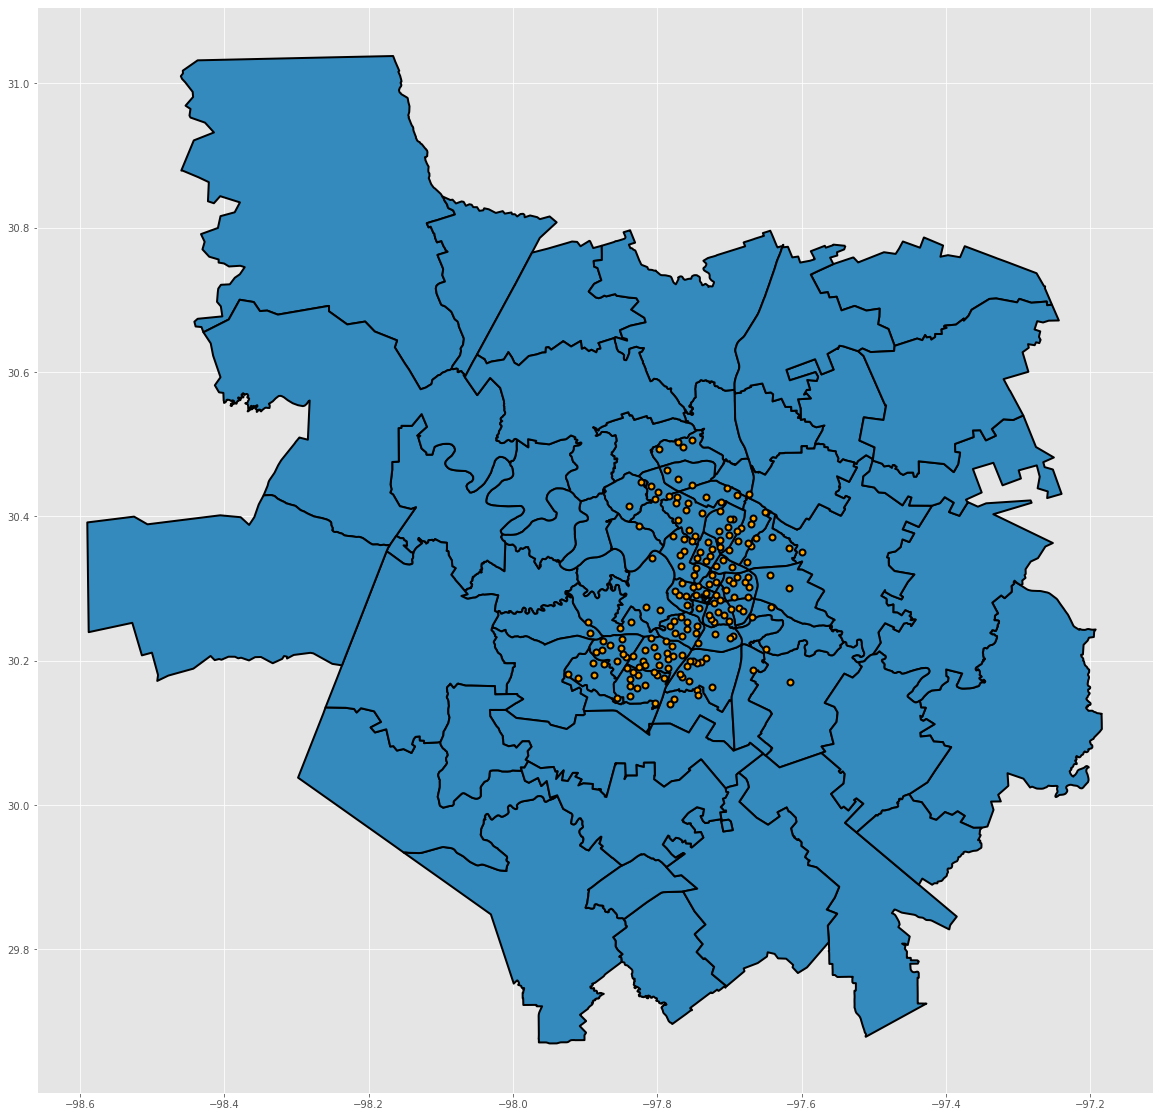

In [6]:
import matplotlib.pyplot as plt
# %matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 20)

fig, ax = plt.subplots()

zips.geometry.plot(color=None, edgecolor='k',linewidth = 2,ax=ax)
routes_df.geometry.plot(color='Orange', edgecolor='k',linewidth = 2,ax=ax)

zip_coords = zips[['zipcode','geometry']]

route_coords = routes_df[['Garb Rt','geometry']]

In [7]:
# This cycles through all of the route coords and prints the coords with the zip code. Next step, change the print to a return, and then apply it to a new zip column in the route_df. 
#DICT TO CONTAIN POINT AND ZIP
point_and_route = {"point":[], "zip":[]};
for j in route_coords['geometry']:
    idx = 0
    found = 0
    while (found == 0):
        if Point(j).within(zip_coords['geometry'][idx]) or Point(j).intersects(zip_coords['geometry'][idx]):
            point_and_route["point"].append(str(j))
            point_and_route["zip"].append(str(zip_coords['zipcode'][idx]))
            found = 1
        else:
            idx += 1

route_coords["POINT"] = point_and_route["point"]

route_coords["ZIP"] = point_and_route["zip"]

route_coords

/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,Garb Rt,geometry,POINT,ZIP
0,PW41,POINT (-97.66989 30.35876),POINT (-97.66989257 30.35876415),78754
1,PW40,POINT (-97.67500 30.36326),POINT (-97.67499719 30.36325543),78753
2,PW32,POINT (-97.64161 30.37146),POINT (-97.64161360999999 30.37145619),78754
3,PW31,POINT (-97.68382 30.38422),POINT (-97.68381677000001 30.38422137),78753
4,PW30,POINT (-97.66285 30.37008),POINT (-97.66284967999999 30.37007561),78754
...,...,...,...,...
179,PAF50,POINT (-97.77022 30.29098),POINT (-97.77021897 30.29097973),78703
180,PAF04,POINT (-97.77542 30.29641),POINT (-97.77542129 30.29641263),78703
181,PAF03,POINT (-97.76675 30.33084),POINT (-97.76674749999999 30.33084492),78731
182,PAF02,POINT (-97.76568 30.30814),POINT (-97.76567716 30.30814288),78703


In [12]:
route_coords.to_csv("route_coordinate_zip.csv")

In [10]:
# Import df_2017_routes (from waste_data_etl and on S3)
df_2017_routes = pd.read_csv("routes_2017_weight.csv")
df_2017_routes

,route_number,load_weight,the_geom
0,PAF01,632960.0,MULTIPOLYGON (((-97.80021375787697 30.36733765...
1,PAF02,678100.0,MULTIPOLYGON (((-97.77221898831849 30.32271999...
2,PAF03,649520.0,MULTIPOLYGON (((-97.7601229300713 30.340361143...
3,PAF04,651640.0,MULTIPOLYGON (((-97.77662750513846 30.30588241...
4,PAF50,545080.0,MULTIPOLYGON (((-97.7724542400386 30.297463218...
...,...,...,...
179,PW30,695240.0,MULTIPOLYGON (((-97.66261984847549 30.37680261...
180,PW31,592380.0,MULTIPOLYGON (((-97.67217156802867 30.38962603...
181,PW32,877080.0,MULTIPOLYGON (((-97.62769959285579 30.35480320...
182,PW40,725460.0,MULTIPOLYGON (((-97.67111672171524 30.36307041...


In [13]:
df_routes_zips = route_coords.join(df_2017_routes.set_index('route_number'),on='Garb Rt')
df_routes_zips= df_routes_zips[["Garb Rt","ZIP","load_weight"]]

In [14]:
df_routes_zips

,Garb Rt,ZIP,load_weight
0,PW41,78754,1206148.0
1,PW40,78753,725460.0
2,PW32,78754,877080.0
3,PW31,78753,592380.0
4,PW30,78754,695240.0
...,...,...,...
179,PAF50,78703,545080.0
180,PAF04,78703,651640.0
181,PAF03,78731,649520.0
182,PAF02,78703,678100.0


Zips:
  geodb_oid objectid zipcodes_i zipcode        name created_by created_da  \
0         3        3         56   78739      AUSTIN                         
1         4        4         57   78645     LEANDER                         
2        16       16         10   78602     BASTROP                         
3        17       17         11   78655  MARTINDALE                         
4        18       18         12   78617   DEL VALLE                         

  modified_b modified_d        shape_area         shape_len cartodb_id  \
0                        338340541.543711  97785.7933337692          3   
1                        1043395959.57919  196654.442799695          4   
2                        5914481887.52673  506803.883036815          9   
3                        1846885535.93133  212904.793002763         10   
4                        1885223526.51104  273994.824301404         11   

                      created_at                     updated_at  \
0  2015-06-07 00:48

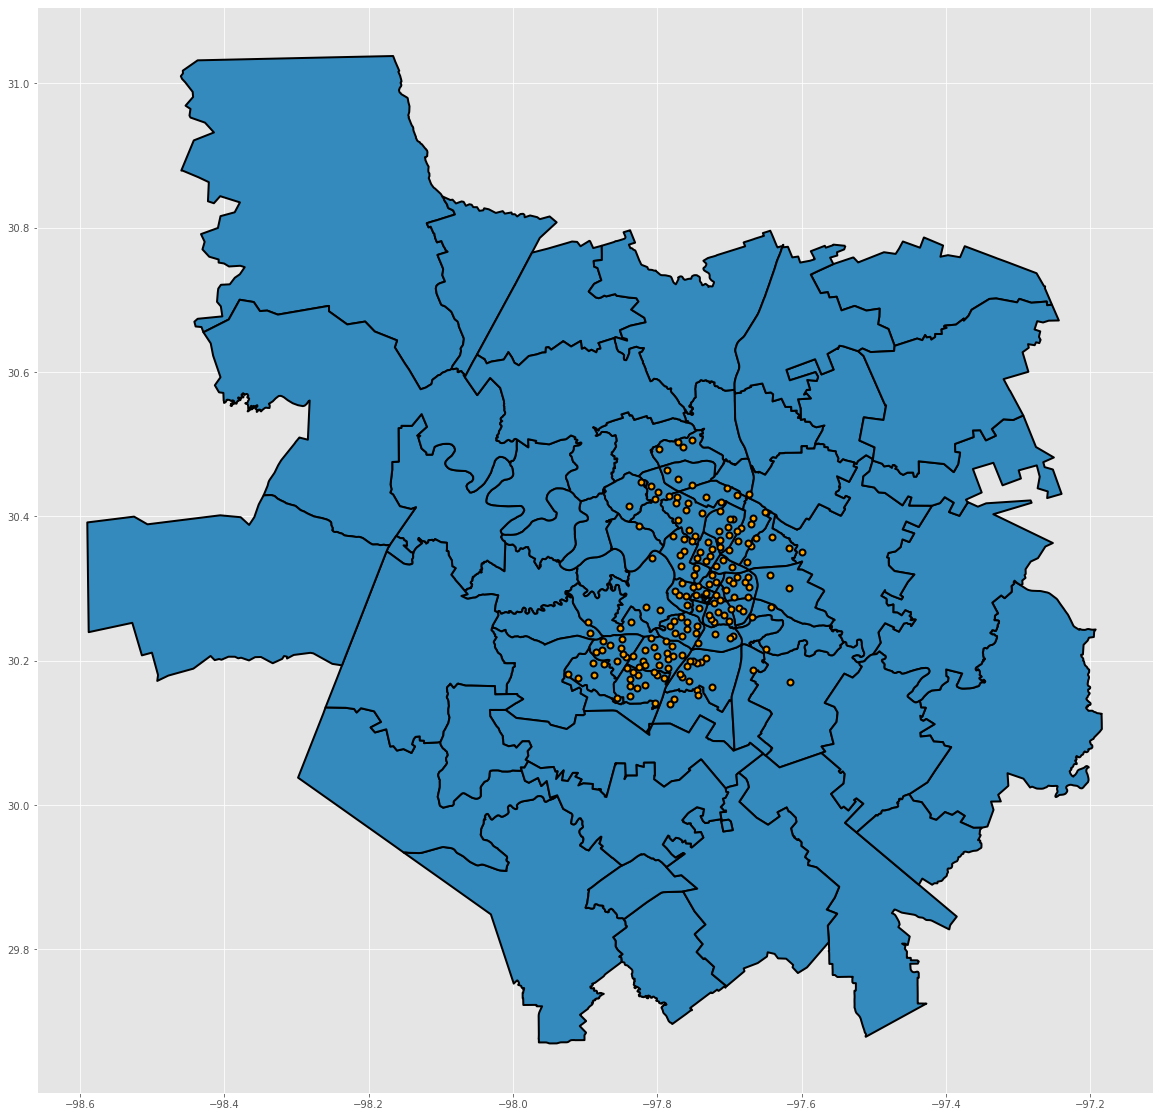

In [14]:
#Merge route_cords and df_2017_routes to have the weight added to the first or the zip to the second
#THIS NEEDS TO HAPPEN IN SQL



#taken from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html#pandas.DataFrame.join
#using example halfway down page with 'key_A' = 'Garb Rt' and 'key_B' = 'route_number', df_example = "route_coords" and df_other = "df_2017_routes"

df_routes_zips = route_coords.join(df_2017_routes.set_index('route_number'),on='Garb Rt')
df_routes_zips= df_routes_zips[["Garb Rt","ZIP","load_weight"]]


print(df_routes_zips.head())
df_full_zip_codes['ZIPCODE'] = df_full_zip_codes['ZIPCODE'].astype(str)
df_routes_zips['ZIP'] = df_routes_zips['ZIP'].astype(str)
df_routes_zips_demographics = df_routes_zips.join(df_full_zip_codes.set_index('ZIPCODE'),on='ZIP')
print("\n"*10 +"Joined Dataframes (routes - zips - demographics)")
print(df_routes_zips_demographics.sort_values(by=['ZIP']).head(15))
#Using mean to perform group by without affecting median income, average income, total_housing units, etc
df_zips_demographics = df_routes_zips_demographics.set_index("ZIP").groupby(level="ZIP").mean()
#using sum to get the entire load weight in each zip code
df_zips_demographics['load_weight'] = df_routes_zips_demographics.set_index("ZIP").groupby(level="ZIP").sum()['load_weight']
print(df_zips_demographics.sort_values(by=['ZIP']).head(10))

df_zips_demographics.to_csv("zips_load_demographics.csv")

In [11]:
df_full_zip_codes = pd.read_csv("full_zip_codes.csv")
df_full_zip_codes

FileNotFoundError: [Errno 2] No such file or directory: 'full_zip_codes.csv'